## SVM 思想解决回归问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 使用LinearSVR

In [5]:
def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [6]:
svr.score(X_test, y_test)

0.6365977817307389

## 使用SVR

In [7]:
# 生成数据
N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
print('x =\n', x)
print('y =\n', y)

x =
 [[0.1127388 ]
 [0.12131038]
 [0.36135283]
 [0.42621635]
 [0.5227758 ]
 [0.70964656]
 [0.77355779]
 [0.86011972]
 [1.26229537]
 [1.58733367]
 [1.89257011]
 [2.1570474 ]
 [2.18226463]
 [2.30064911]
 [2.48797164]
 [2.5419288 ]
 [2.62219172]
 [2.62552327]
 [2.73690199]
 [2.76887617]
 [3.13108993]
 [3.17336952]
 [3.2692991 ]
 [3.29288102]
 [3.40826737]
 [3.41060369]
 [3.61658026]
 [3.67257434]
 [3.70160398]
 [3.70581298]
 [3.83952613]
 [3.87536468]
 [4.00060029]
 [4.02382722]
 [4.09092179]
 [4.18578718]
 [4.2911362 ]
 [4.64540214]
 [4.66894051]
 [4.68317506]
 [4.75035023]
 [4.79495139]
 [4.99571907]
 [5.22007289]
 [5.350638  ]
 [5.55357983]
 [5.66248847]
 [5.6680135 ]
 [5.78197656]
 [5.87171005]]
y =
 [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.69233817 -0.06030957 -0.23617129 -0.23697659 -0.341601

In [8]:
# 训练模型
print('SVR - RBF')
svr_rbf = SVR(kernel='rbf', gamma=0.2, C=100)
svr_rbf.fit(x, y)
print('SVR - Linear')
svr_linear = SVR(kernel='linear', C=100)
svr_linear.fit(x, y)
print('SVR - Polynomial')
svr_poly = SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(x, y)
print('Fit OK.')

SVR - RBF
SVR - Linear
SVR - Polynomial
Fit OK.


In [9]:
# 预测
# 思考：系数1.1改成1.5
x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)

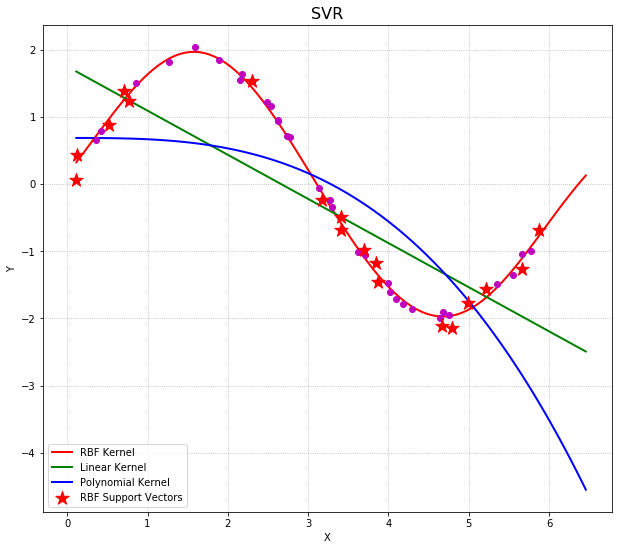

In [10]:
plt.figure(figsize=(9, 8), facecolor='w')
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=200, c='r', marker='*', label='RBF Support Vectors', zorder=10)
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(b=True, ls=':')
plt.tight_layout(2)
plt.show()

In [13]:
x_test = np.linspace(x.min(), 1.5*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)

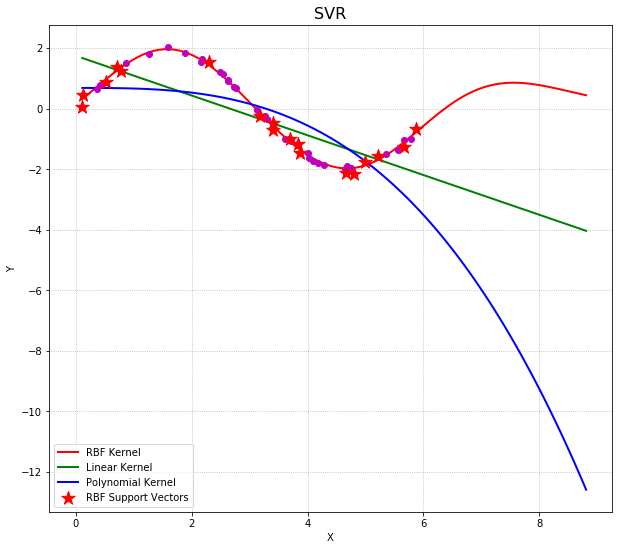

In [14]:
plt.figure(figsize=(9, 8), facecolor='w')
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=200, c='r', marker='*', label='RBF Support Vectors', zorder=10)
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(b=True, ls=':')
plt.tight_layout(2)
plt.show()

## 用GrideSearchCV 进行调参

In [16]:
from sklearn.model_selection import GridSearchCV，RandomizedSearchCV
model = SVR(kernel='rbf')
c_can = np.logspace(-2, 2, 10)
gamma_can = np.logspace(-2, 2, 10)
svr = GridSearchCV(model, param_grid={'C': c_can, 'gamma': gamma_can}, cv=5)
svr.fit(x, y)
print('验证参数：\n', svr.best_params_)

验证参数：
 {'C': 35.93813663804626, 'gamma': 0.5994842503189409}


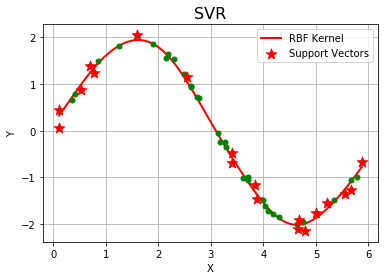

In [17]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_hat = svr.predict(x_test)

sp = svr.best_estimator_.support_
plt.figure(facecolor='w')
plt.scatter(x[sp], y[sp], s=120, c='r', marker='*', label='Support Vectors', zorder=3)
plt.plot(x_test, y_hat, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x, y, 'go', markersize=5)
plt.legend(loc='upper right')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()